In [1]:
# Version Check
import sys
import tensorflow as tf
import tensorflow_datasets as tfds
import PIL
import pandas as pd
import numpy as np
import scipy
print("python", sys.version)
print("tensorflow", tf.__version__)
print("tensorflow-datasets", tfds.__version__)
print("Pillow", PIL.__version__)
print("pandas", pd.__version__)
print("numpy", np.__version__)
print("scipy", scipy.__version__)
print()
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("Built with GPU support:", tf.test.is_built_with_gpu_support())

python 3.8.0 (default, Nov  6 2019, 16:00:02) [MSC v.1916 64 bit (AMD64)]
tensorflow 2.6.2
tensorflow-datasets 4.4.0
Pillow 8.3.2
pandas 1.3.3
numpy 1.19.5
scipy 1.7.1

Num GPUs Available: 1
Built with CUDA: True
Built with GPU support: True


## 1. Load data / Preprocessing

In [2]:
# load data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()
print('train_set:', x_train.shape, y_train.shape)
print('valid_set:', x_valid.shape, y_valid.shape)

train_set: (60000, 28, 28) (60000,)
valid_set: (10000, 28, 28) (10000,)


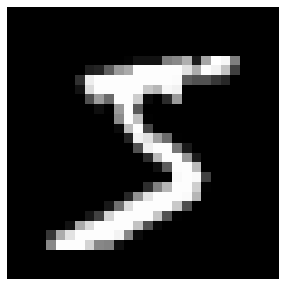

In [3]:
import matplotlib.pylab as plt  # .pylab

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap='gray')
    plt.axis('off')
    plt.show()

plot_image(x_train, 0)

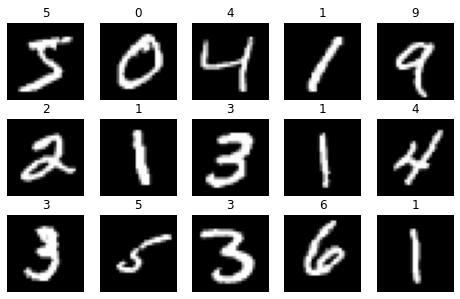

In [4]:
import matplotlib.pylab as plt  # .pylab

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(8, 5))
    
for i in range(15):
    ax = axes[i//5, i%5]
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))
        
plt.show()    

In [5]:
# min, max
print('train_set', x_train.min(), x_train.max())
print('valid_set', x_valid.min(), x_valid.max())

train_set 0 255
valid_set 0 255


In [6]:
# normalization
x_train = x_train / 255.0
x_valid = x_valid / 255.0

In [7]:
# min, max
print('train_set', x_train.min(), x_train.max())
print('valid_set', x_valid.min(), x_valid.max())

train_set 0.0 1.0
valid_set 0.0 1.0


In [8]:
# add one channel at the end (60000, 28, 28, 1) -> (60000,)
x_train = x_train[..., tf.newaxis]
x_valid = x_valid[..., tf.newaxis]

# add one channel at the beginning [tf.newaxis, ...]
# add one channel at the 2nd [:, tf.newaxis, :, :]

In [9]:
print('train_set:', x_train.shape, y_train.shape)
print('valid_set:', x_valid.shape, y_valid.shape)

train_set: (60000, 28, 28, 1) (60000,)
valid_set: (10000, 28, 28, 1) (10000,)


## 2. Sequential API

In [10]:
# model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv'),  # num filters, filter size
    MaxPooling2D((2, 2), name='pool'),
    Flatten(name='flatten'),
    Dense(10, activation='softmax', name='output')
])

# compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# fit
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2149 - acc: 0.9387 - val_loss: 0.0951 - val_acc: 0.9713
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0797 - acc: 0.9772 - val_loss: 0.0632 - val_acc: 0.9798
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0604 - acc: 0.9825 - val_loss: 0.0585 - val_acc: 0.9809
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0506 - acc: 0.9852 - val_loss: 0.0589 - val_acc: 0.9814
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0420 - acc: 0.9873 - val_loss: 0.0587 - val_acc: 0.9815
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0363 - acc: 0.9888 - val_loss: 0.0553 - val_acc: 0.9815
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0311 - acc: 0.9905 - val_loss: 0.0520 - val_acc: 0.9833
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

In [11]:
# evaluate
model.evaluate(x_valid, y_valid)

313/313 [==============================] - 0s 2ms/step - loss: 0.0658 - acc: 0.9807


[0.06576015800237656, 0.9807000160217285]

In [12]:
def plot_loss_acc(history, epoch):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    import matplotlib.pylab as plt
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    
    ax1.plot(range(1, epoch+1), loss, label='loss')
    ax1.plot(range(1, epoch+1), val_loss, label='val_loss')
    ax1.set_title('loss')
    ax1.legend()
    
    ax2.plot(range(1, epoch+1), acc, label='acc')
    ax2.plot(range(1, epoch+1), val_acc, label='val_acc')
    ax2.set_title('acc')
    ax2.legend()
        
    plt.show()

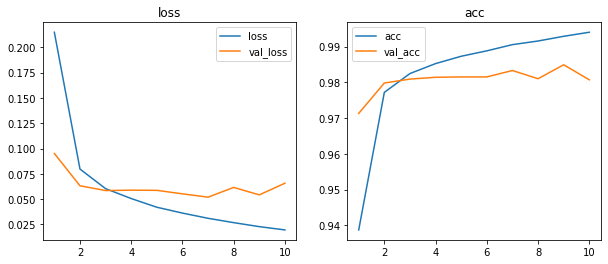

In [13]:
plot_loss_acc(history, 10)

## 3. understanding model

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv (Conv2D)                (None, 26, 26, 32)        320       
_________________________________________________________________
pool (MaxPooling2D)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
output (Dense)               (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [15]:
# None in output shapes: batch | none means any size of batch is possible.

# conv output shape: (28, 28, 1) -> (26, 26, 32)
# - 28, 28 -> 26, 26 due to (3, 3) filter size
# - 1 -> 32 due to 32 number of filters

# conv param #:
# - weights(=kernel): 288 = filter_size(3*3) * input_channel(1) * output_channel(32, =num filters)
# - bias: output_channel(32, =num filters)
# - total: 320 = 288 + 32

# pool outout shape: (26, 26, 32) -> (13, 13, 32)
# - due to (2, 2) size maxpooling layer

# flatten output shape: 5,408 = 13 * 13 * 32

# output output shape: 10 = 10 classes

In [16]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [17]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'output')>

In [18]:
model.layers

In [19]:
model.layers[0]

In [20]:
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [21]:
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [22]:
# conv param #:
# - weights(=kernel): 288 = filter_size(3*3) * input_channel(1) * output_channel(32, =num filters)
# - bias: output_channel(32, =num filters)
# - total: 320 = 288 + 32

model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-2.46171623e-01, -1.08850904e-01, -3.62515189e-02,
           -5.53671062e-01, -4.97172236e-01, -7.11193860e-01,
            1.27216727e-01, -4.05353695e-01, -1.59445092e-01,
           -1.19462088e-01, -4.14614052e-01,  2.22083271e-01,
            6.13810480e-01,  4.30403978e-01,  2.74802804e-01,
            8.50498825e-02, -8.85855556e-02,  1.94282636e-01,
           -9.62822795e-01, -6.88430786e-01, -7.28996515e-01,
            2.76285261e-01,  1.04920916e-01,  4.35852945e-01,
           -1.38599694e-01,  2.59324551e-01,  3.23516816e-01,
           -1.08093941e+00, -4.65415984e-01, -1.02168417e+00,
            3.27828437e-01, -1.48650616e-01]],
 
         [[ 2.68740468e-02,  3.89319837e-01,  1.66323692e-01,
           -9.92408633e-01, -2.59774119e-01,  2.00588912e-01,
            3.45537007e-01,  1.97032720e-01, -3.00870717e-01,
           -5.85173428e-01, -1.27291992e-01,  7.02553615e-02,
           

In [23]:
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-2.46171623e-01, -1.08850904e-01, -3.62515189e-02,
          -5.53671062e-01, -4.97172236e-01, -7.11193860e-01,
           1.27216727e-01, -4.05353695e-01, -1.59445092e-01,
          -1.19462088e-01, -4.14614052e-01,  2.22083271e-01,
           6.13810480e-01,  4.30403978e-01,  2.74802804e-01,
           8.50498825e-02, -8.85855556e-02,  1.94282636e-01,
          -9.62822795e-01, -6.88430786e-01, -7.28996515e-01,
           2.76285261e-01,  1.04920916e-01,  4.35852945e-01,
          -1.38599694e-01,  2.59324551e-01,  3.23516816e-01,
          -1.08093941e+00, -4.65415984e-01, -1.02168417e+00,
           3.27828437e-01, -1.48650616e-01]],

        [[ 2.68740468e-02,  3.89319837e-01,  1.66323692e-01,
          -9.92408633e-01, -2.59774119e-01,  2.00588912e-01,
           3.45537007e-01,  1.97032720e-01, -3.00870717e-01,
          -5.85173428e-01, -1.27291992e-01,  7.02553615e-02,
           2.70847052e-01,  

In [24]:
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.25107723, -0.31905064, -0.29595447, -0.0146521 ,  0.00450889,
       -0.05686859, -0.2640619 , -0.27832982, -0.18261483, -0.0866105 ,
       -0.23721632, -0.33728078, -0.07441493, -0.01819973, -0.31373686,
        0.07265858, -0.19957373, -0.02352915, -0.11590143, -0.16562924,
       -0.07515782, -0.2999809 , -0.21285562,  0.1706969 , -0.2973269 ,
       -0.22275141, -0.26567888, -0.01470602, -0.16630758, -0.01392658,
       -0.3490946 , -0.24926342], dtype=float32)>

In [25]:
model.get_layer('conv')  # using name

In [26]:
# conv2d, maxpooling2d output prediction
activator = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train[0][tf.newaxis, ...])
len(activations)

2

In [27]:
# Conv2D layer
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

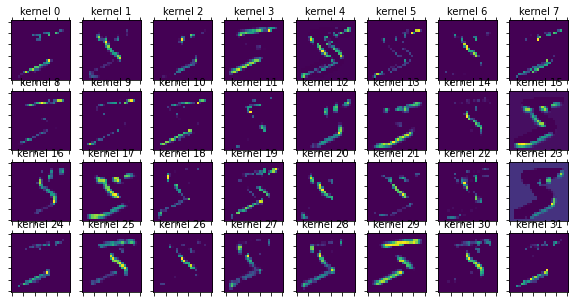

In [28]:
# Conv2D visualization

fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(10, 5))

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s' %str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.show()

In [29]:
# MaxPooling2D layer
pooling_activation = activations[1]
pooling_activation.shape

(1, 13, 13, 32)

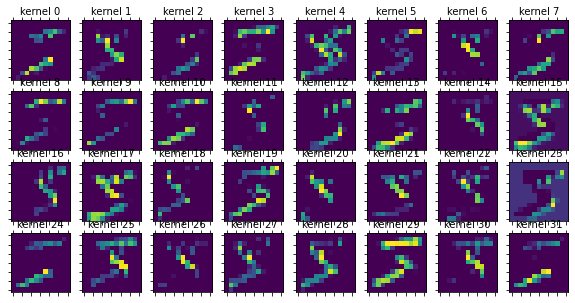

In [30]:
# MaxPooling2D visualization

fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(10, 5))

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s' %str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.show()